In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your dataset
df = pd.read_csv('dataset_modelling.csv')

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Label'], test_size=0.2, random_state=42)

In [4]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [5]:
# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)

MultinomialNB()

In [6]:
# Make predictions
y_pred = clf.predict(X_test_vectorized)

In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", classification_rep)
print(f"Accuracy: {accuracy * 100:.2f}%")

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.07      0.13       194
     neutral       0.00      0.00      0.00       135
    positive       0.90      1.00      0.95      2847

    accuracy                           0.90      3176
   macro avg       0.63      0.36      0.36      3176
weighted avg       0.87      0.90      0.86      3176

Accuracy: 90.05%


C:\Users\Sanchan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanchan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanchan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


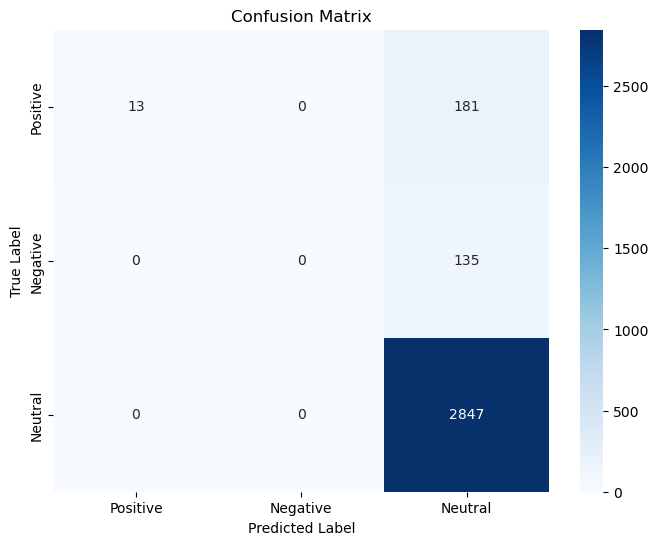

In [8]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()